In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [8]:
# create an Observables object to store information for derivatives
pars = np.array( ['sigma_dmeff'])
centers = np.array([1e-25])
steps = np.array([1e-25])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'omega_cdm':1e-15,
                   'omega_dmeff':0.120,
                   'npow_dmeff':0,
                   'Vrel_dmeff':0,
                   'dmeff_target': 'baryons',
                   'm_dmeff':1.,
                   'lensing': 'y' }

# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial', classy_dict=classy_template)

In [9]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_right', classy_dict=classy_right)

In [23]:
CMB_S4 = CMB_Primary(
    theta_fwhm=[1.5], sigma_T=[1.], sigma_P=[1.],
    f_sky=0.4, l_min=2, l_max=2500)
ACT_or_S3 = CMB_Primary(
    theta_fwhm=[1.4], sigma_T=[10.], sigma_P=[10.],
    f_sky=0.4, l_min=2, l_max=2080)
Planck_assumption = CMB_Primary(
    theta_fwhm=[14,10,7.,5.,5.], sigma_T=[137,65.,43.,66.,200], sigma_P=[450,103.,81.,134.,406],
    f_sky=0.6, l_min=2, l_max=2500)

information_Planck = Planck_assumption.get_fisher_per_l(obs)
information_S4 = CMB_S4.get_fisher_per_l(obs)
information_Planck_TT = Planck_assumption.get_fisher_per_l_TT(obs)
information_S4_TT = CMB_S4.get_fisher_per_l_TT(obs)
information_ACT_or_S3 = ACT_or_S3.get_fisher_per_l(obs)
information_ACT_or_S3_TT = ACT_or_S3.get_fisher_per_l_TT(obs)

In [25]:
# open the ACT DR6 lensing noise file

f1 = open('/Users/juliexue/Desktop/fishchips/N_L_xcorr_noise_curve_act_dr6_lensing_map_v1.txt')

actdr6 = []

for x in f1.readlines():
    actdr6.append(x.split()[1])
    
actdr6_kk = np.array(actdr6[2:])
actdr6_kk = actdr6_kk.astype('float64')

information_ACT_or_S3_kk = information_ACT_or_S3 + actdr6_kk

information_ACT_or_S3_kk

array([6.79744798e-08, 6.79744798e-08, 8.00301316e+38, ...,
       1.57976796e+49, 1.57664973e+49, 1.57352084e+49])

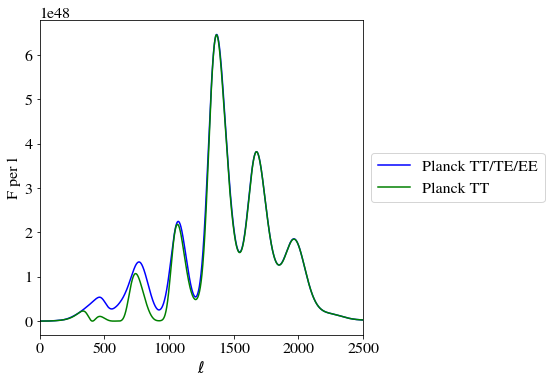

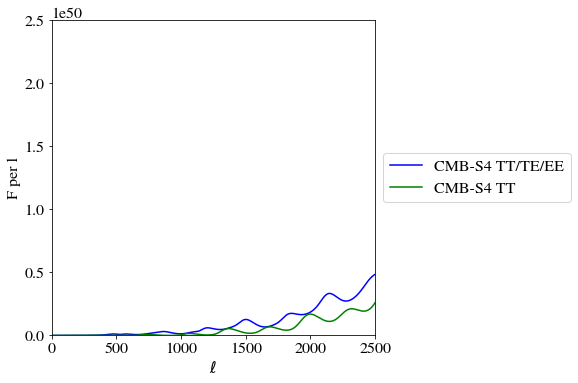

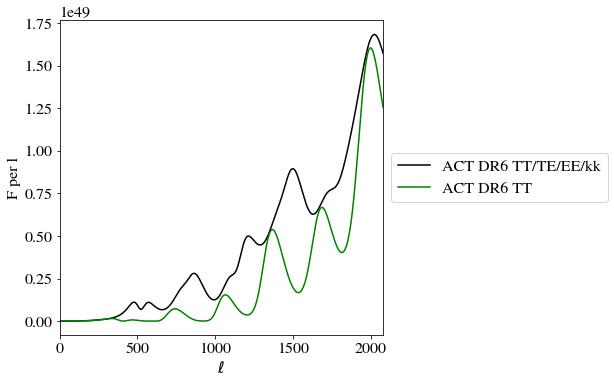

In [33]:
# fonts and sizes
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [5.8,5.8]

l_numbers = np.arange(2500)
l_numbers_2080 = np.arange(2080)

# Planck
plt.figure(1)
plt.xlim([0,2500])
plt.xlabel(r'$\ell$')
plt.ylabel(r'F per l')
plt.plot(l_numbers, information_Planck, color = 'blue', linestyle = '-', label = 'Planck TT/TE/EE')
plt.plot(l_numbers, information_Planck_TT, color = 'green', linestyle = '-', label = 'Planck TT')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#CMB-S4
plt.figure(2)
plt.xlim([0,2500])
plt.ylim([0,2.5*1e50])
plt.xlabel(r'$\ell$')
plt.ylabel(r'F per l')
plt.plot(l_numbers, information_S4, color = 'blue', linestyle = '-', label = 'CMB-S4 TT/TE/EE')
plt.plot(l_numbers, information_S4_TT, color = 'green', linestyle = '-', label = 'CMB-S4 TT')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ACT DR6
plt.figure(3)
plt.xlim([0,2080])
plt.xlabel(r'$\ell$')
plt.ylabel(r'F per l')
plt.plot(l_numbers_2080, information_ACT_or_S3_kk, color = 'black', linestyle = '-', label = 'ACT DR6 TT/TE/EE/kk')
#plt.plot(l_numbers_2080, information_ACT_or_S3, color = 'blue', linestyle = '-', label = 'ACT DR6 TT/TE/EE')
plt.plot(l_numbers_2080, information_ACT_or_S3_TT, color = 'green', linestyle = '-', label = 'ACT DR6 TT')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))